In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.shape

(1728, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [5]:
data.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
Counter(data.outcome)

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [11]:
data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [13]:
data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [14]:
data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [21]:
X = data.iloc[:,:-1]
y = data.outcome
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [44]:
enc = LabelEncoder()
X.buying = enc.fit_transform(X.buying)
X.maint = enc.fit_transform(X.maint)
X.lug_boot = enc.fit_transform(X.lug_boot)
X.safety = enc.fit_transform(X.safety)
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2
5,3,3,2,2,1,0
6,3,3,2,2,0,1
7,3,3,2,2,0,2
8,3,3,2,2,0,0
9,3,3,2,4,2,1


In [22]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
153,3,0,3,5,2,1
1333,1,3,3,4,2,2
1509,1,0,5,5,0,1
703,0,2,4,2,2,2
1672,1,1,3,5,0,2


In [68]:
model = KNeighborsClassifier(n_neighbors=,metric='euclidean')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [69]:
accuracy_score(y_test,y_predict)

0.9566473988439307

In [62]:
confusion_matrix(y_test,y_predict)

array([[ 56,   2,   5,   1],
       [  6,   7,   0,   0],
       [ 18,   0, 233,   0],
       [  4,   2,   0,  12]], dtype=int64)

In [63]:
pd.crosstab(y_test,y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,56,2,5,1
good,6,7,0,0
unacc,18,0,233,0
vgood,4,2,0,12


In [64]:
import matplotlib.pyplot as plt

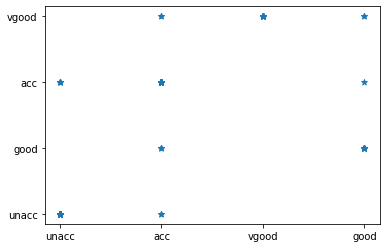

In [77]:
plt.scatter(y_predict,y_test,marker='*')

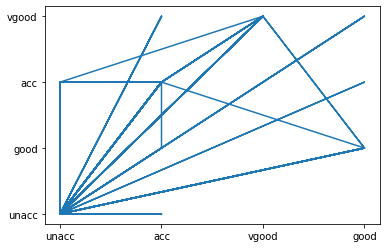

In [78]:
plt.plot(y_predict,y_test)